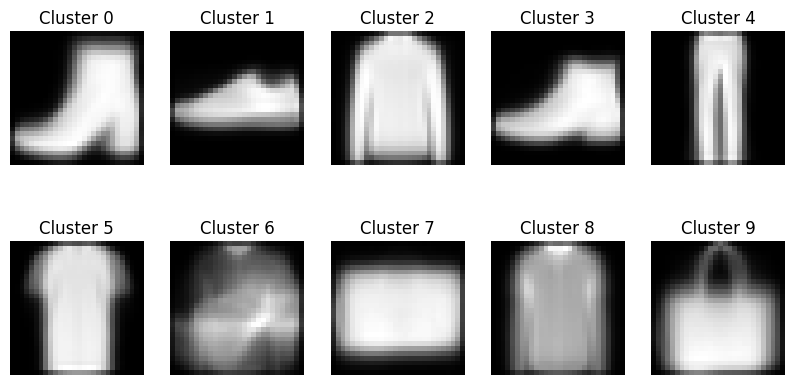

In [17]:
# Assign cluster labels based on majority class
cluster_labels = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    cluster_labels[mask] = np.bincount(y_train[mask]).argmax()

# Visualize the cluster centers
cluster_centers = kmeans.cluster_centers_.reshape((10, 28, 28))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cluster_centers[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


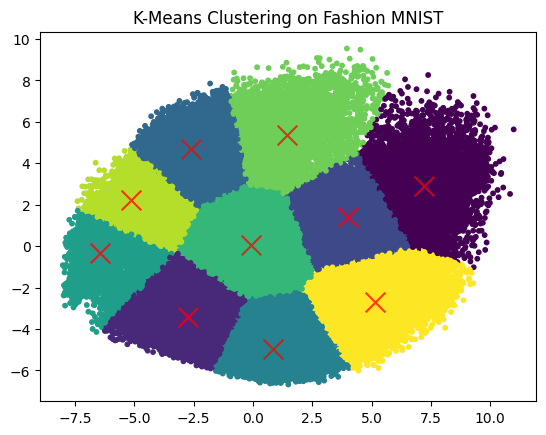

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Fashion MNIST dataset
fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1, cache=True)

# Extract data and labels
X = fashion_mnist.data.astype('float32') / 255.0
y = fashion_mnist.target.astype('int')

# Reduce dimensionality for visualization (you can skip this step if you want)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply k-means clustering
n_clusters = 10  # You can choose the number of clusters based on your preference
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.title('K-Means Clustering on Fashion MNIST')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.39530838789856465
